In [1]:
import pandas as pd
import numpy as np
import os

# Set working directory to project root directory
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set absolute path for data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "DOGEUSDT_1m_1h-pump05_190705_250302.csv")

# Load data into data frame
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2019-07-05 12:00:00,0.00449,0.004600,0.003760,0.004200,60726008.0,521.0,40516981.0,175346.099186,0,...,NaN,2.004895,0.200000,0.667210,NaN,NaN,NaN,0.334419,NaN,0.172414
1,2019-07-05 12:01:00,0.00420,0.004387,0.004200,0.004300,84307704.0,561.0,40173084.0,173854.886129,0,...,NaN,0.910240,0.043535,0.476505,NaN,NaN,NaN,-0.046989,NaN,0.172414
2,2019-07-05 12:02:00,0.00430,0.004475,0.004300,0.004475,48182744.0,291.0,33036098.0,144634.353695,0,...,NaN,2.181083,0.038999,0.685642,NaN,NaN,NaN,0.371283,NaN,0.172414
3,2019-07-05 12:03:00,0.00445,0.004450,0.004169,0.004250,66457853.0,289.0,8266236.0,35932.694923,0,...,NaN,0.142052,0.066118,0.124383,NaN,NaN,NaN,-0.751234,NaN,0.172414
4,2019-07-05 12:04:00,0.00425,0.004385,0.004250,0.004350,22016425.0,179.0,9954068.0,43020.451542,0,...,NaN,0.825217,0.031011,0.452120,NaN,NaN,NaN,-0.095760,NaN,0.172414


In [2]:
from utils.model.model_manager import ModelManager

# Configure model manager
symbol = "DOGEUSDT"
start_date = "2019-07-05"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(custom_path=data_path)

# Split and prepare data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(            open      high       low     close      volume  num_trades  \
 0        0.00449  0.004600  0.003760  0.004200  60726008.0       521.0   
 1        0.00420  0.004387  0.004200  0.004300  84307704.0       561.0   
 2        0.00430  0.004475  0.004300  0.004475  48182744.0       291.0   
 3        0.00445  0.004450  0.004169  0.004250  66457853.0       289.0   
 4        0.00425  0.004385  0.004250  0.004350  22016425.0       179.0   
 ...          ...       ...       ...       ...         ...         ...   
 2929465  0.33144  0.331460  0.331220  0.331400    413353.0       645.0   
 2929466  0.33141  0.331560  0.331380  0.331500     77219.0       218.0   
 2929467  0.33149  0.331500  0.331300  0.331320    141002.0       248.0   
 2929468  0.33132  0.331530  0.331290  0.331520     78133.0       267.0   
 2929469  0.33152  0.331600  0.331440  0.331530    174349.0       283.0   
 
          taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0            40516981

In [3]:
# Configure model with default params
manager.configure_model()

# Fit and evaluate model
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.5, min_precision=0.6)


🏋️ Training model...


python3(56271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



🎯 Tuning threshold...
Optimal threshold: 0.8107


np.float64(0.8106686822981158)

In [4]:
# Get and print metrics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.8107
AUC-ROC Score: 0.9978

Overall Metrics:
Accuracy:  0.9961
Precision: 0.9957
Recall:    0.9961
F1-Score:  0.9956

Class 0 Metrics:
Precision: 0.9967
Recall:    0.9994
F1-Score:  0.9980

Class 1 Metrics:
Precision: 0.8412
Recall:    0.5018
F1-Score:  0.6286

Using raw probabilities
Classification threshold: 0.8107
{'accuracy': 0.9960880535172797, 'precision': 0.9956740535629017, 'recall': 0.9960880535172797, 'f1': 0.9955963038125922, 'auc_roc': np.float64(0.9978454851828051), 'optimal_threshold': np.float64(0.8106686822981158), 'precision_0': 0.9967000534498385, 'recall_0': 0.9993708640134216, 'f1_0': 0.9980336719140865, 'precision_1': 0.8411764705882353, 'recall_1': 0.5017543859649123, 'f1_1': 0.6285714285714286}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


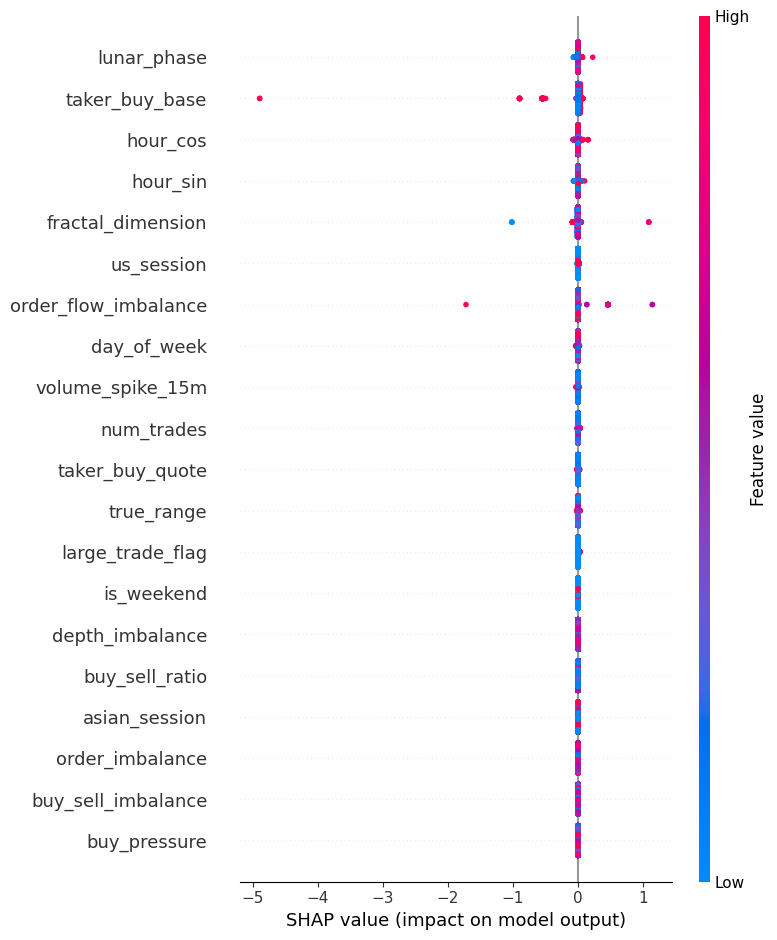


📈 Calculating feature importance...


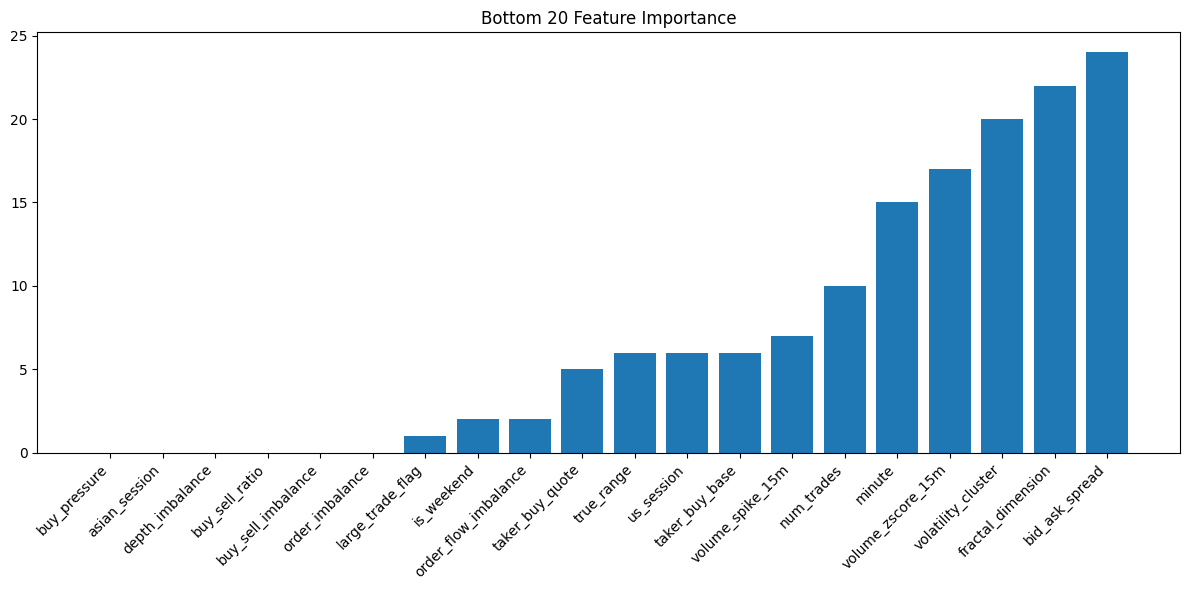

Found existing experiment
Identical result already exists for experiment ID: 12
Logged feature importance for experiment ID: 12


In [5]:
# Get and plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)

# Get and plot feature analysis
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

# Init tracker
from utils.model.experiment_tracker import ExperimentTracker

# Log experiment, results, and feature analysis metrics
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1m",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config wf model
manager.configure_walk_forward_model()

# Define features
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf validation
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
wf.plot_metrics_over_time()

In [ ]:
# Initialize Experiment Tracker
from utils.model.experiment_tracker import ExperimentTracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)